__Importing libraries__

In [775]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier

import warnings
warnings.filterwarnings("ignore")

__Importing dataset__

In [526]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\CP2\Online_Fraud_dataset.csv')

__Data Information__

In [528]:
df.head(10)

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,TXN100000,Kimberly Thompson,gillhayden@example.net,156.33,16-04-2024,Martinez Inc,danny75@example.net,Nauru,123986772468,May-27,234,178.150.196.43,Desktop,Online,True
1,TXN100001,Stephanie Pena,gdavis@example.net,128.76,27-09-2024,Williams-Owen,jewing@example.net,Bolivia,426745838527,May-31,491,36.99.25.53,Mobile,In-store,False
2,TXN100002,Jeanne Lawrence,davisbrittany@example.org,224.83,24-01-2024,Jones-Stanton,marie98@example.net,Tuvalu,294532825919,Dec-34,509,64.108.101.33,Desktop,In-store,False
3,TXN100003,Jeffrey Palmer,lynndean@example.net,237.23,08-04-2024,Watson Ltd,jenny23@example.org,Colombia,373250829492,Mar-30,160,112.188.243.122,Desktop,In-store,False
4,TXN100004,Mr. Charles Harper,adamslauren@example.org,308.58,25-10-2024,Porter LLC,derrickjohnson@example.net,Azerbaijan,856381067125,Oct-25,549,89.205.125.233,Desktop,Online,False
5,TXN100005,Laura Graham,melvin14@example.com,554.42,08-08-2024,Garcia Ltd,wardgeorge@example.net,Sudan,299900874253,Aug-31,886,218.27.122.0,NaN,Online,True
6,TXN100006,Jay Scott,matthewcoffey@example.net,448.22,17-09-2024,Graham-Rivera,jimeneztabitha@example.com,Uganda,608219040419,Oct-30,807,110.117.166.13,Desktop,Online,True
7,TXN100007,Amy Brown,brandon93@example.org,810.83,07-02-2024,"Martinez, Reynolds and Hale",adamosborn@example.org,NaN,89764554869,Sep-26,981,218.251.86.22,Mobile,In-store,False
8,TXN100008,Tara Riley,adam10@example.org,563.11,18-08-2024,Frazier LLC,fisherkristen@example.org,United Arab Emirates,476131473187,Feb-34,931,20.30.88.224,Tablet,In-store,True
9,TXN100009,Latoya Watson,anthony66@example.com,734.86,24-08-2024,Dougherty-Bauer,waynemacdonald@example.net,New Zealand,226485162785,Sep-26,518,13.5.122.116,Desktop,Online,True


__Shape of data and checking the missing values__

In [530]:
print("Shape of the datacolumn: ",df.shape)
df.isna().sum()

Shape of the datacolumn:  (2000, 15)


Transaction_ID         0
Customer_Name          0
Customer_Email         0
Transaction_Amount     0
Transaction_Date      48
Merchant_Name          0
Merchant_Email         0
Merchant_Location     38
Card_Number            0
Card_Expiry            0
Card_CVV               0
IP_Address             0
Device_Type           37
Transaction_Type      35
Fraudulent             0
dtype: int64

In [531]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction_ID      2000 non-null   object 
 1   Customer_Name       2000 non-null   object 
 2   Customer_Email      2000 non-null   object 
 3   Transaction_Amount  2000 non-null   float64
 4   Transaction_Date    1952 non-null   object 
 5   Merchant_Name       2000 non-null   object 
 6   Merchant_Email      2000 non-null   object 
 7   Merchant_Location   1962 non-null   object 
 8   Card_Number         2000 non-null   int64  
 9   Card_Expiry         2000 non-null   object 
 10  Card_CVV            2000 non-null   int64  
 11  IP_Address          2000 non-null   object 
 12  Device_Type         1963 non-null   object 
 13  Transaction_Type    1965 non-null   object 
 14  Fraudulent          2000 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(11)
memory usa

In [532]:
df[['Transaction_Amount','Merchant_Location','Device_Type','Transaction_Type']]

,Transaction_Amount,Merchant_Location,Device_Type,Transaction_Type
0,156.33,Nauru,Desktop,Online
1,128.76,Bolivia,Mobile,In-store
2,224.83,Tuvalu,Desktop,In-store
3,237.23,Colombia,Desktop,In-store
4,308.58,Azerbaijan,Desktop,Online
...,...,...,...,...
1995,604.12,Mauritania,Tablet,In-store
1996,911.55,Antigua and Barbuda,Tablet,In-store
1997,388.91,American Samoa,Mobile,Online
1998,682.25,Tokelau,Desktop,Online


In [533]:
# Identify the locations with less than or equal to 5 occurrences
location_counts = df['Merchant_Location'].value_counts()
other_locations = location_counts[location_counts <= 5].index

# Replace these locations with "Other"
df['Merchant_Location'] = df['Merchant_Location'].apply(
    lambda x: 'Other' if x in other_locations else x
)

df['Merchant_Location'].value_counts()[200:]

Series([], Name: count, dtype: int64)

In [534]:
df['Transaction_Type'].unique()

array(['Online', 'In-store', nan], dtype=object)

In [535]:
df[df['Transaction_Type'].isnull()]

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
15,TXN100015,Angela Schaefer,breannasmith@example.com,807.07,11-12-2024,Thomas-Carson,avilakristen@example.net,British Indian Ocean Territory (Chagos Archipe...,607456950489,Jun-30,161,195.252.191.27,Mobile,NaN,True
57,TXN100057,Kevin Hoover,jlopez@example.net,516.36,03-10-2024,"Ware, Gutierrez and Schultz",philipwatson@example.net,Yemen,802928435547,Mar-27,717,132.144.128.215,Desktop,NaN,False
89,TXN100089,Heather Hughes,paulwright@example.org,877.09,11-07-2024,"Hernandez, Church and Cain",fwolfe@example.com,Heard Island and McDonald Islands,667260675199,Sep-32,892,54.162.113.226,NaN,NaN,True
126,TXN100126,Mark Gonzales,ebooth@example.net,692.83,21-12-2024,Ramirez Inc,john31@example.com,Bulgaria,319815977048,Sep-33,855,100.197.240.194,Mobile,NaN,True
164,TXN100164,Joe Collins,david20@example.net,395.17,13-06-2024,Simpson Ltd,tammyhendricks@example.net,Other,234214041295,Jan-32,838,91.141.235.115,Tablet,NaN,True
219,TXN100219,William Martin,calvinmoore@example.com,704.48,11-06-2024,Cameron and Sons,valenciacourtney@example.com,Bosnia and Herzegovina,707897115843,Jan-26,821,142.159.188.187,Mobile,NaN,True
270,TXN100270,April Woodard,fergusonrhonda@example.com,612.88,13-04-2024,Garcia PLC,stephanie91@example.net,Andorra,16261034048,Sep-33,686,146.28.34.86,Desktop,NaN,False
334,TXN100334,Robert Mclean,matthewzimmerman@example.org,722.44,12-12-2024,"Barnes, Weber and Peterson",lucasfrank@example.org,Liechtenstein,917671179555,Jan-31,103,217.239.82.83,Desktop,NaN,True
377,TXN100377,Brandon Chavez,dianagreen@example.net,557.72,13-09-2024,"Payne, Jones and Powers",karenrivera@example.com,Myanmar,276591656081,Jul-33,473,215.203.120.245,Tablet,NaN,True
414,TXN100414,Paula King,tjackson@example.com,998.52,08-12-2024,Thomas-Allen,iwarner@example.net,Other,178723942402,Dec-26,274,110.163.229.224,Desktop,NaN,False


In [536]:
df= df[~df['Transaction_Type'].isnull()]
df = df.reset_index(drop = True)
df.head()

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,TXN100000,Kimberly Thompson,gillhayden@example.net,156.33,16-04-2024,Martinez Inc,danny75@example.net,Nauru,123986772468,May-27,234,178.150.196.43,Desktop,Online,True
1,TXN100001,Stephanie Pena,gdavis@example.net,128.76,27-09-2024,Williams-Owen,jewing@example.net,Bolivia,426745838527,May-31,491,36.99.25.53,Mobile,In-store,False
2,TXN100002,Jeanne Lawrence,davisbrittany@example.org,224.83,24-01-2024,Jones-Stanton,marie98@example.net,Tuvalu,294532825919,Dec-34,509,64.108.101.33,Desktop,In-store,False
3,TXN100003,Jeffrey Palmer,lynndean@example.net,237.23,08-04-2024,Watson Ltd,jenny23@example.org,Colombia,373250829492,Mar-30,160,112.188.243.122,Desktop,In-store,False
4,TXN100004,Mr. Charles Harper,adamslauren@example.org,308.58,25-10-2024,Porter LLC,derrickjohnson@example.net,Azerbaijan,856381067125,Oct-25,549,89.205.125.233,Desktop,Online,False


In [537]:
df['Device_Type'].unique()

array(['Desktop', 'Mobile', nan, 'Tablet'], dtype=object)

In [538]:
df[df['Device_Type'].isnull()]

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
5,TXN100005,Laura Graham,melvin14@example.com,554.42,08-08-2024,Garcia Ltd,wardgeorge@example.net,Sudan,299900874253,Aug-31,886,218.27.122.0,NaN,Online,True
46,TXN100047,Lauren White,yhunt@example.org,162.78,26-03-2024,Neal-Miller,robinsoncody@example.net,Israel,95736191363,Nov-25,290,28.98.255.181,NaN,In-store,True
121,TXN100124,Debbie Reese,palmerveronica@example.net,467.61,02-05-2024,Ayala Ltd,dramirez@example.com,Turks and Caicos Islands,422928918432,Aug-26,343,137.198.82.248,NaN,In-store,False
154,TXN100158,David Reyes,rodrigueztyler@example.com,201.03,27-01-2024,"Perez, Brown and Small",mileschristian@example.com,Korea,947429066103,Apr-26,114,161.46.167.194,NaN,In-store,True
183,TXN100188,Lisa Zimmerman,gutierrezrobert@example.net,472.26,20-12-2024,Stephens-Clark,bmitchell@example.net,Other,868902248620,Oct-29,658,55.17.93.17,NaN,In-store,True
209,TXN100214,Autumn Saunders,brianbrown@example.com,484.46,18-12-2024,"Good, Martin and Parsons",jennifergardner@example.net,Croatia,903308219833,Feb-25,289,163.57.24.39,NaN,In-store,False
237,TXN100243,Emily Johnson,smithkenneth@example.com,69.05,24-08-2024,"Rose, Warren and Sandoval",sanchezalexander@example.org,Korea,54550288244,Nov-32,852,17.16.140.229,NaN,In-store,False
259,TXN100265,Joshua Clay,cschroeder@example.com,786.45,27-06-2024,"Lam, Rogers and Byrd",ashleybowen@example.net,Cambodia,489537382566,Mar-34,607,44.141.59.61,NaN,Online,False
278,TXN100285,Benjamin Allison,nruiz@example.net,998.41,11-09-2024,Marshall-Mercer,rodriguezjoseph@example.org,New Zealand,317449342467,May-25,526,33.3.232.166,NaN,Online,False
306,TXN100313,Matthew White,kphillips@example.com,791.71,31-07-2024,Benton PLC,monicacarlson@example.org,Cayman Islands,731382971680,Jan-28,902,51.83.0.73,NaN,Online,True


In [539]:
df= df[~df['Device_Type'].isnull()]
df = df.reset_index(drop = True)
df.head()

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,TXN100000,Kimberly Thompson,gillhayden@example.net,156.33,16-04-2024,Martinez Inc,danny75@example.net,Nauru,123986772468,May-27,234,178.150.196.43,Desktop,Online,True
1,TXN100001,Stephanie Pena,gdavis@example.net,128.76,27-09-2024,Williams-Owen,jewing@example.net,Bolivia,426745838527,May-31,491,36.99.25.53,Mobile,In-store,False
2,TXN100002,Jeanne Lawrence,davisbrittany@example.org,224.83,24-01-2024,Jones-Stanton,marie98@example.net,Tuvalu,294532825919,Dec-34,509,64.108.101.33,Desktop,In-store,False
3,TXN100003,Jeffrey Palmer,lynndean@example.net,237.23,08-04-2024,Watson Ltd,jenny23@example.org,Colombia,373250829492,Mar-30,160,112.188.243.122,Desktop,In-store,False
4,TXN100004,Mr. Charles Harper,adamslauren@example.org,308.58,25-10-2024,Porter LLC,derrickjohnson@example.net,Azerbaijan,856381067125,Oct-25,549,89.205.125.233,Desktop,Online,False


__Treatment for handling missing values__

In [541]:
#Filling numeric columns with mean or median 
numeric_columns = df.select_dtypes(include='number')
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

In [542]:
#Filling categorical columns with mode
categorical_columns = df.select_dtypes(include='object')
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values handled successfully!")

Missing values handled successfully!


In [543]:
df.isnull().sum()

Transaction_ID        0
Customer_Name         0
Customer_Email        0
Transaction_Amount    0
Transaction_Date      0
Merchant_Name         0
Merchant_Email        0
Merchant_Location     0
Card_Number           0
Card_Expiry           0
Card_CVV              0
IP_Address            0
Device_Type           0
Transaction_Type      0
Fraudulent            0
dtype: int64

__Statistical analysis of data__

In [545]:
df.describe()

,Transaction_Amount,Card_Number,Card_CVV
count,1930.000000,1.930000e+03,1930.000000
mean,530.073570,5.016887e+11,549.296891
std,276.308514,2.887603e+11,259.401429
min,50.320000,4.685707e+08,100.000000
25%,285.697500,2.527169e+11,325.250000
50%,536.120000,4.958983e+11,553.000000
75%,769.720000,7.557797e+11,765.000000
max,999.680000,9.988683e+11,999.000000


In [546]:
df.dtypes

Transaction_ID         object
Customer_Name          object
Customer_Email         object
Transaction_Amount    float64
Transaction_Date       object
Merchant_Name          object
Merchant_Email         object
Merchant_Location      object
Card_Number             int64
Card_Expiry            object
Card_CVV                int64
IP_Address             object
Device_Type            object
Transaction_Type       object
Fraudulent               bool
dtype: object

__value counts of target variable__

In [548]:
df['Fraudulent'].value_counts()

Fraudulent
True     1168
False     762
Name: count, dtype: int64

In [549]:
df.size

28950

__Checking duplicates__

In [551]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1925    False
1926    False
1927    False
1928    False
1929    False
Length: 1930, dtype: bool

In [552]:
df = df.dropna()
df

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
0,TXN100000,Kimberly Thompson,gillhayden@example.net,156.33,16-04-2024,Martinez Inc,danny75@example.net,Nauru,123986772468,May-27,234,178.150.196.43,Desktop,Online,True
1,TXN100001,Stephanie Pena,gdavis@example.net,128.76,27-09-2024,Williams-Owen,jewing@example.net,Bolivia,426745838527,May-31,491,36.99.25.53,Mobile,In-store,False
2,TXN100002,Jeanne Lawrence,davisbrittany@example.org,224.83,24-01-2024,Jones-Stanton,marie98@example.net,Tuvalu,294532825919,Dec-34,509,64.108.101.33,Desktop,In-store,False
3,TXN100003,Jeffrey Palmer,lynndean@example.net,237.23,08-04-2024,Watson Ltd,jenny23@example.org,Colombia,373250829492,Mar-30,160,112.188.243.122,Desktop,In-store,False
4,TXN100004,Mr. Charles Harper,adamslauren@example.org,308.58,25-10-2024,Porter LLC,derrickjohnson@example.net,Azerbaijan,856381067125,Oct-25,549,89.205.125.233,Desktop,Online,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925,TXN101995,Jennifer Palmer,peter23@example.com,604.12,15-07-2024,Johnson Group,batessandra@example.net,Mauritania,306748912233,Mar-27,425,107.99.120.6,Tablet,In-store,True
1926,TXN101996,Brittany Hunter,eringomez@example.net,911.55,11-02-2024,"Bailey, Wilson and Massey",sortiz@example.net,Antigua and Barbuda,916494676991,Aug-30,956,36.186.0.221,Tablet,In-store,False
1927,TXN101997,Denise Owens,joshua95@example.net,388.91,21-09-2024,Moore-Johnson,kellis@example.net,Other,77198862482,Aug-33,138,154.162.114.76,Mobile,Online,False
1928,TXN101998,Cynthia Dalton,nparrish@example.org,682.25,01-08-2024,Patel and Sons,tcarter@example.net,Tokelau,698051203503,Jan-27,937,146.231.151.164,Desktop,Online,True


In [553]:
df.columns

Index(['Transaction_ID', 'Customer_Name', 'Customer_Email',
       'Transaction_Amount', 'Transaction_Date', 'Merchant_Name',
       'Merchant_Email', 'Merchant_Location', 'Card_Number', 'Card_Expiry',
       'Card_CVV', 'IP_Address', 'Device_Type', 'Transaction_Type',
       'Fraudulent'],
      dtype='object')

In [554]:
df.describe(include=object)

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Expiry,IP_Address,Device_Type,Transaction_Type
count,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930,1930
unique,1930,1912,1926,366,1828,1924,199,121,1930,3,2
top,TXN100000,Justin Aguirre,maria54@example.com,14-06-2024,Williams Inc,chartman@example.org,Other,Aug-25,178.150.196.43,Desktop,In-store
freq,1,2,2,57,6,2,213,27,1,682,983


__Getting the distinct values of each column__

In [556]:
for column in df.columns:
    unique_val=df[column].unique()
    print("unique values of {} are {}".format(column,unique_val))

unique values of Transaction_ID are ['TXN100000' 'TXN100001' 'TXN100002' ... 'TXN101997' 'TXN101998'
 'TXN101999']
unique values of Customer_Name are ['Kimberly Thompson' 'Stephanie Pena' 'Jeanne Lawrence' ... 'Denise Owens'
 'Cynthia Dalton' 'Arthur Harris']
unique values of Customer_Email are ['gillhayden@example.net' 'gdavis@example.net' 'davisbrittany@example.org'
 ... 'joshua95@example.net' 'nparrish@example.org' 'xboyd@example.net']
unique values of Transaction_Amount are [156.33 128.76 224.83 ... 388.91 682.25 612.95]
unique values of Transaction_Date are ['16-04-2024' '27-09-2024' '24-01-2024' '08-04-2024' '25-10-2024'
 '17-09-2024' '07-02-2024' '18-08-2024' '24-08-2024' '22-01-2024'
 '17-03-2024' '25-01-2024' '14-06-2024' '21-09-2024' '17-01-2025'
 '28-05-2024' '14-03-2024' '04-03-2024' '13-10-2024' '30-10-2024'
 '09-09-2024' '17-07-2024' '22-11-2024' '22-09-2024' '01-11-2024'
 '11-10-2024' '25-08-2024' '23-06-2024' '28-02-2024' '20-11-2024'
 '25-03-2024' '06-04-2024' '06-09-2

__Filter rows based on condition'Transaction_Amount' >= 800__

In [558]:
filtered_Transaction_Amount = df[df['Transaction_Amount'] >=800 ]
print("Total records:", len(filtered_Transaction_Amount))
filtered_Transaction_Amount.head()

Total records: 409


,Transaction_ID,Customer_Name,Customer_Email,Transaction_Amount,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Number,Card_Expiry,Card_CVV,IP_Address,Device_Type,Transaction_Type,Fraudulent
6,TXN100007,Amy Brown,brandon93@example.org,810.83,07-02-2024,"Martinez, Reynolds and Hale",adamosborn@example.org,Other,89764554869,Sep-26,981,218.251.86.22,Mobile,In-store,False
10,TXN100011,Jessica Rogers,christine64@example.com,980.03,17-03-2024,Keller Group,hawkinsdavid@example.net,Ukraine,84784270824,Oct-27,832,145.43.107.223,Desktop,In-store,True
12,TXN100013,Joseph Torres,cmorales@example.com,830.73,14-06-2024,Escobar Group,zroberts@example.net,Chile,196547586666,Jun-30,792,215.245.102.54,Desktop,Online,True
18,TXN100020,Beth Christensen,monicalambert@example.net,953.65,04-03-2024,Clark-Brown,jonesjohn@example.net,Estonia,866765097436,Jan-29,190,104.121.180.161,Tablet,Online,False
19,TXN100021,Richard Lopez,leegina@example.com,852.14,13-10-2024,"Whitaker, Michael and Pierce",kristen64@example.net,Cook Islands,196987398749,Dec-30,183,115.170.195.210,Tablet,In-store,True


In [559]:
# Filering specific columns
subset_data = df[[ 'Customer_Name', 'Transaction_Amount', 'Transaction_Type']]
subset_data

,Customer_Name,Transaction_Amount,Transaction_Type
0,Kimberly Thompson,156.33,Online
1,Stephanie Pena,128.76,In-store
2,Jeanne Lawrence,224.83,In-store
3,Jeffrey Palmer,237.23,In-store
4,Mr. Charles Harper,308.58,Online
...,...,...,...
1925,Jennifer Palmer,604.12,In-store
1926,Brittany Hunter,911.55,In-store
1927,Denise Owens,388.91,Online
1928,Cynthia Dalton,682.25,Online


In [560]:
# Accessing specific rows and columns using iloc
# Select the first three rows and the first two columns
rows_and_cols=df.iloc[0:3,0:2]
rows_and_cols

,Transaction_ID,Customer_Name
0,TXN100000,Kimberly Thompson
1,TXN100001,Stephanie Pena
2,TXN100002,Jeanne Lawrence


In [561]:
filterd_num=df.select_dtypes(include='int').iloc[0:5,:]
filterd_num

,Card_Number,Card_CVV
0,123986772468,234
1,426745838527,491
2,294532825919,509
3,373250829492,160
4,856381067125,549


In [562]:
filterd_num=df.select_dtypes(include='number').iloc[0:5,:]
filterd_num

,Transaction_Amount,Card_Number,Card_CVV
0,156.33,123986772468,234
1,128.76,426745838527,491
2,224.83,294532825919,509
3,237.23,373250829492,160
4,308.58,856381067125,549


In [563]:
filterd_obj=df.select_dtypes(include='object').iloc[0:4,:]
filterd_obj

,Transaction_ID,Customer_Name,Customer_Email,Transaction_Date,Merchant_Name,Merchant_Email,Merchant_Location,Card_Expiry,IP_Address,Device_Type,Transaction_Type
0,TXN100000,Kimberly Thompson,gillhayden@example.net,16-04-2024,Martinez Inc,danny75@example.net,Nauru,May-27,178.150.196.43,Desktop,Online
1,TXN100001,Stephanie Pena,gdavis@example.net,27-09-2024,Williams-Owen,jewing@example.net,Bolivia,May-31,36.99.25.53,Mobile,In-store
2,TXN100002,Jeanne Lawrence,davisbrittany@example.org,24-01-2024,Jones-Stanton,marie98@example.net,Tuvalu,Dec-34,64.108.101.33,Desktop,In-store
3,TXN100003,Jeffrey Palmer,lynndean@example.net,08-04-2024,Watson Ltd,jenny23@example.org,Colombia,Mar-30,112.188.243.122,Desktop,In-store


In [564]:
filterd_obj=df.select_dtypes(include='float').iloc[0:4,:]
filterd_obj

,Transaction_Amount
0,156.33
1,128.76
2,224.83
3,237.23


__Correlation Analysis of numeric columns__

In [566]:
numeric_data = df.select_dtypes(include='number')

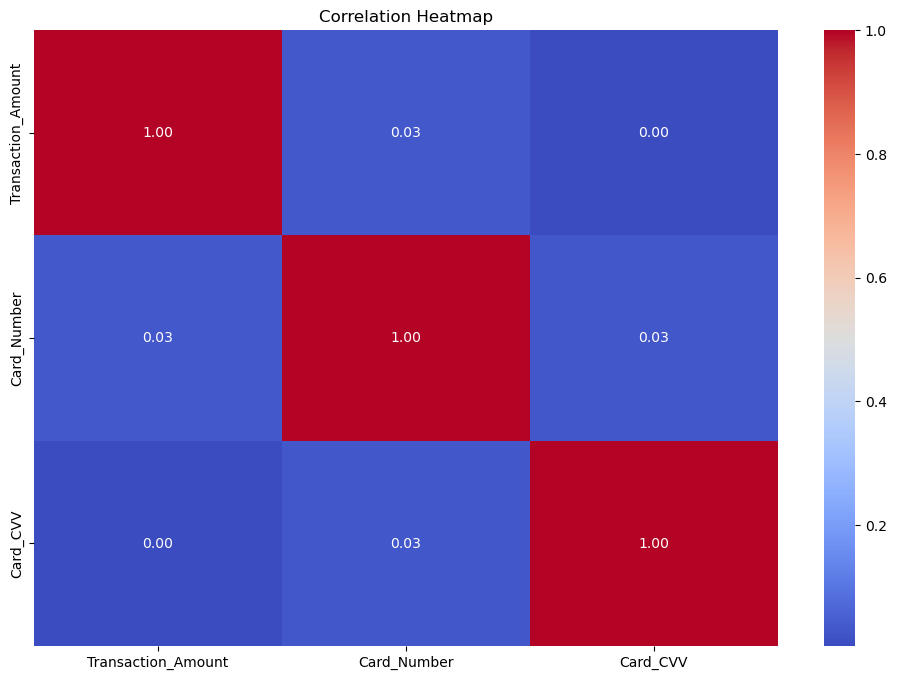

In [567]:
if not numeric_data.empty:
    plt.figure(figsize=(12, 8))
    correlation = numeric_data.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("No numeric columns available for correlation.")

__Data Visualization__

In [570]:
device_counts = df['Device_Type'].value_counts()

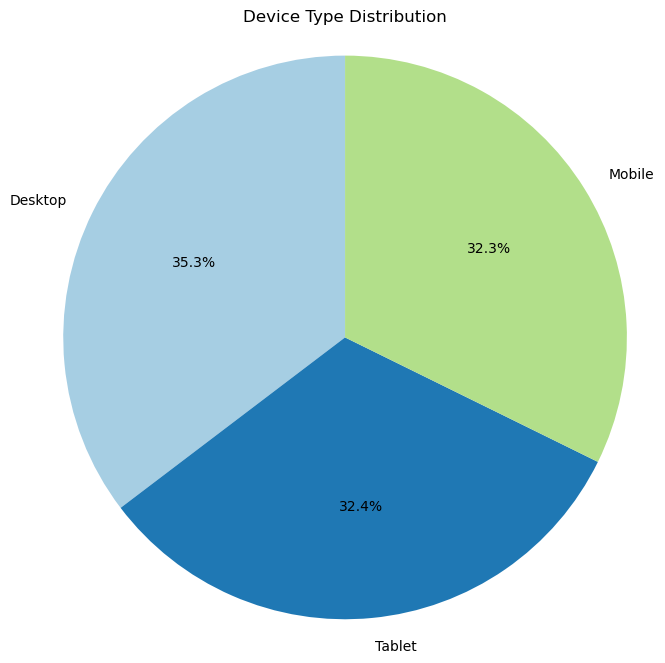

In [571]:
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Device Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

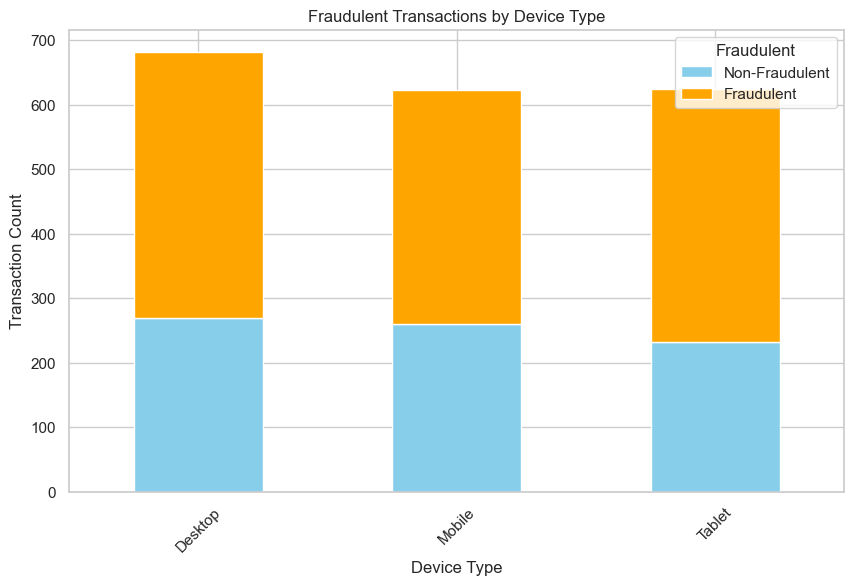

In [799]:
# Create a crosstab for Fraudulent and Device_Type
device_fraud = pd.crosstab(df["Device_Type"], df["Fraudulent"])

# Plot stacked bar chart
device_fraud.plot(
    kind="bar", 
    stacked=True, 
    figsize=(10, 6), 
    color=["skyblue", "orange"]
)
plt.title("Fraudulent Transactions by Device Type")
plt.xlabel("Device Type")
plt.ylabel("Transaction Count")
plt.legend(["Non-Fraudulent", "Fraudulent"], title="Fraudulent")
plt.xticks(rotation=45)
plt.show()


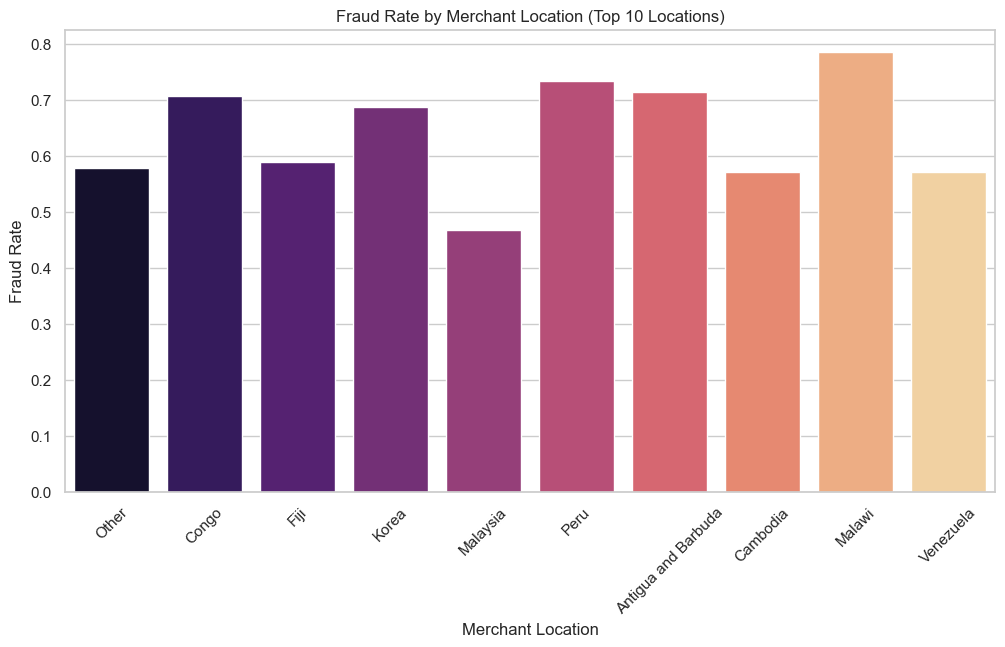

In [811]:
# Group by Merchant_Location and calculate fraud rate
location_data = df.groupby("Merchant_Location").agg(
    total_transactions=("Fraudulent", "count"),
    fraud_rate=("Fraudulent", "mean")
).reset_index()

# Filter top 10 locations with most transactions
top_locations = location_data.nlargest(10, "total_transactions")

# Plot fraud rate by location
plt.figure(figsize=(12, 6))
sns.barplot(data=top_locations, x="Merchant_Location", y="fraud_rate", palette="magma")
plt.title("Fraud Rate by Merchant Location (Top 10 Locations)")
plt.xlabel("Merchant Location")
plt.ylabel("Fraud Rate")
plt.xticks(rotation=45)
plt.show()

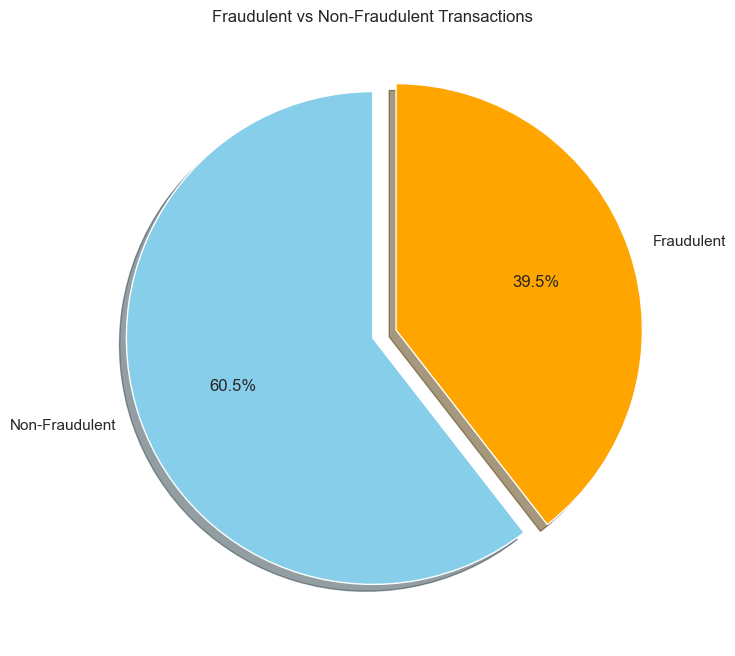

In [815]:
# Calculate the proportion of fraudulent vs non-fraudulent transactions
fraud_counts = df["Fraudulent"].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
fraud_counts.plot.pie(
    autopct="%1.1f%%", 
    labels=["Non-Fraudulent", "Fraudulent"], 
    colors=["skyblue", "orange"], 
    startangle=90,
    explode=[0, 0.1],
    shadow=True
)
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.ylabel("")  # Remove the y-axis label
plt.show()


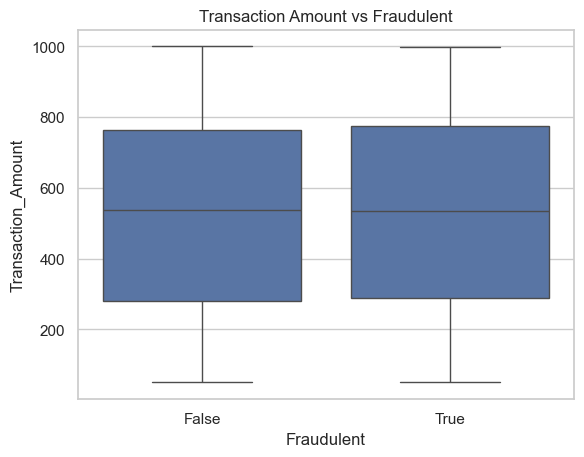

In [824]:
# Box plot to compare Transaction_Amount with Fraudulent
sns.boxplot(x='Fraudulent', y='Transaction_Amount', data=df)
plt.title('Transaction Amount vs Fraudulent')
plt.show()

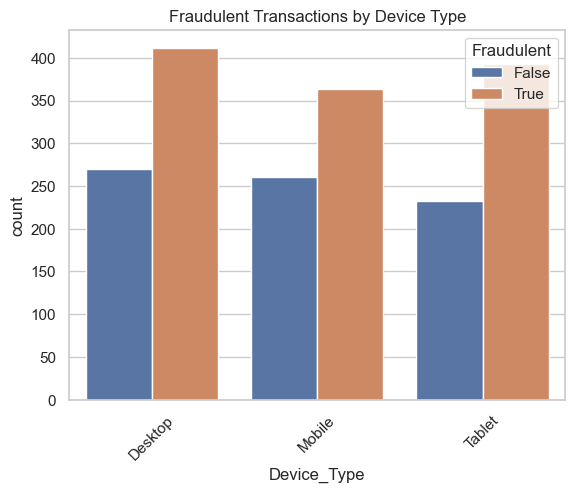

In [826]:
# Count plot to visualize Fraudulent transactions per Device_Type
sns.countplot(x='Device_Type', hue='Fraudulent', data=df)
plt.title('Fraudulent Transactions by Device Type')
plt.xticks(rotation=45)
plt.show()

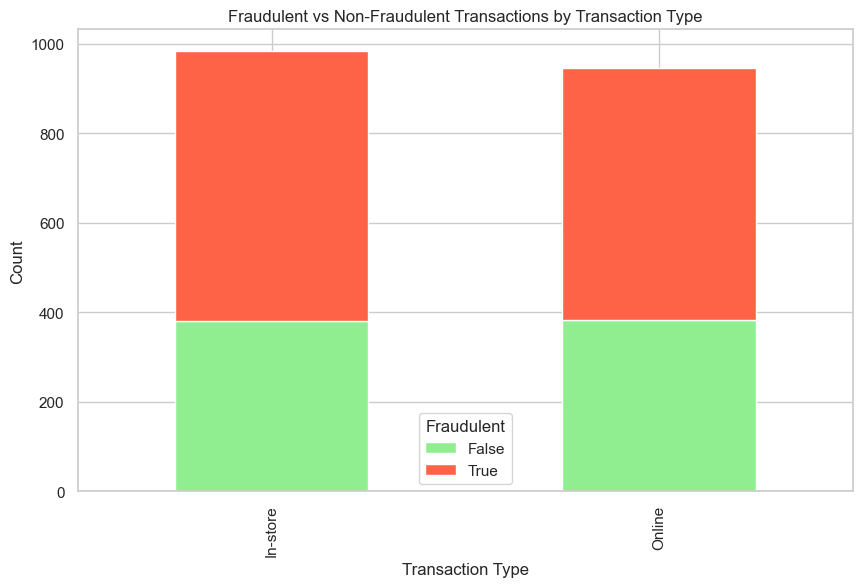

In [836]:
transaction_type_fraudulent = df.groupby(['Transaction_Type', 'Fraudulent']).size().unstack()
transaction_type_fraudulent.plot(kind='bar', stacked=True, color=['lightgreen', 'tomato'], figsize=(10, 6))
plt.title('Fraudulent vs Non-Fraudulent Transactions by Transaction Type')
plt.ylabel('Count')
plt.xlabel('Transaction Type')
plt.show()

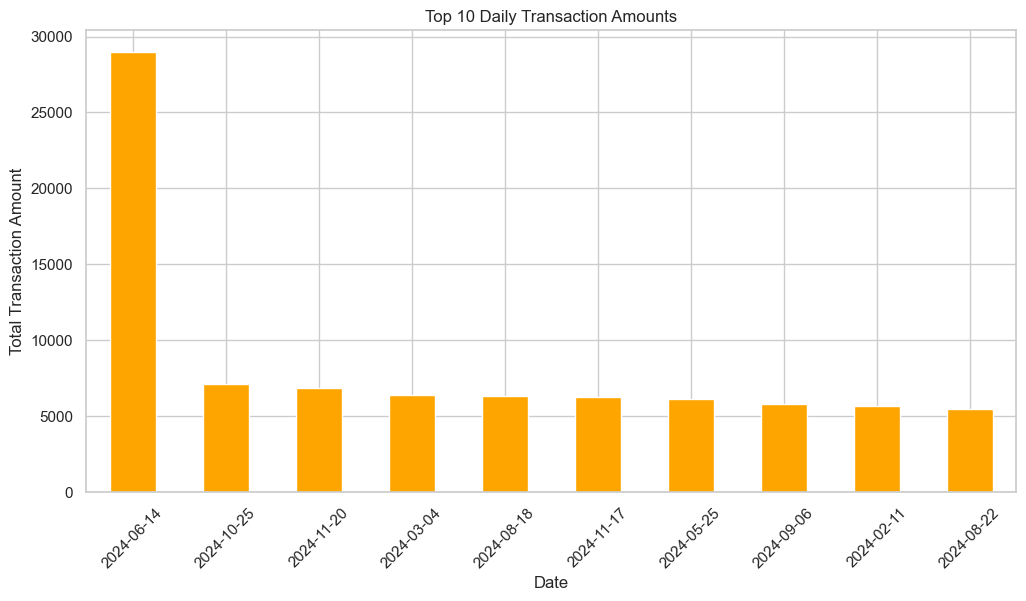

In [844]:
# Aggregate by date and calculate the total transaction amount
daily_transactions = df.groupby(df['Transaction_Date'].dt.date)['Transaction_Amount'].sum()

# Get the top 10 days with the highest transaction amounts using nlargest
top_10_daily_transactions = daily_transactions.nlargest(10)

# Plot the top 10 days
top_10_daily_transactions.plot(kind='bar', figsize=(12, 6), color='orange')
plt.title('Top 10 Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Transaction Amount')
plt.xticks(rotation=45)
plt.show()

In [573]:
df.columns

Index(['Transaction_ID', 'Customer_Name', 'Customer_Email',
       'Transaction_Amount', 'Transaction_Date', 'Merchant_Name',
       'Merchant_Email', 'Merchant_Location', 'Card_Number', 'Card_Expiry',
       'Card_CVV', 'IP_Address', 'Device_Type', 'Transaction_Type',
       'Fraudulent'],
      dtype='object')

__Splitting the data__

In [575]:
X=df[['Transaction_Amount','Merchant_Location','Device_Type','Transaction_Type']]
Y=df["Fraudulent"]

In [576]:
categorical_cols = X.select_dtypes(include=['object']).columns

In [577]:
X_categorical = pd.get_dummies(X[categorical_cols])

In [578]:
X_processed = pd.concat([X.drop(columns=categorical_cols),X_categorical],axis=1)

In [579]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='mean')
X_imputed = imputer.fit_transform(X_processed)

__Standardization the data__

In [581]:
from sklearn.preprocessing import StandardScaler

In [582]:
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [583]:
#Balancing the data
from sklearn.utils import resample

In [584]:
X_balanced,Y_balanced = resample(X_scaled,Y,replace= True,n_samples=X_scaled.shape[0])

__SMOTE Technique__

In [585]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, Y_resampled = smote.fit_resample(X_balanced, Y_balanced)

__Performaning Random Forest Algorithm__`

In [587]:
from sklearn.model_selection import train_test_split

In [588]:
X_train,X_test,Y_train,Y_test = train_test_split(X_resampled,Y_resampled,test_size=0.2,random_state=42)

model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train,Y_train)

Y_pred =model.predict(X_test)

from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are properly defined
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

from sklearn.metrics import accuracy_score
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred))

Confusion Matrix:
[[181  51]
 [ 23 198]]
Accuracy: 0.8366445916114791
              precision    recall  f1-score   support

       False       0.89      0.78      0.83       232
        True       0.80      0.90      0.84       221

    accuracy                           0.84       453
   macro avg       0.84      0.84      0.84       453
weighted avg       0.84      0.84      0.84       453



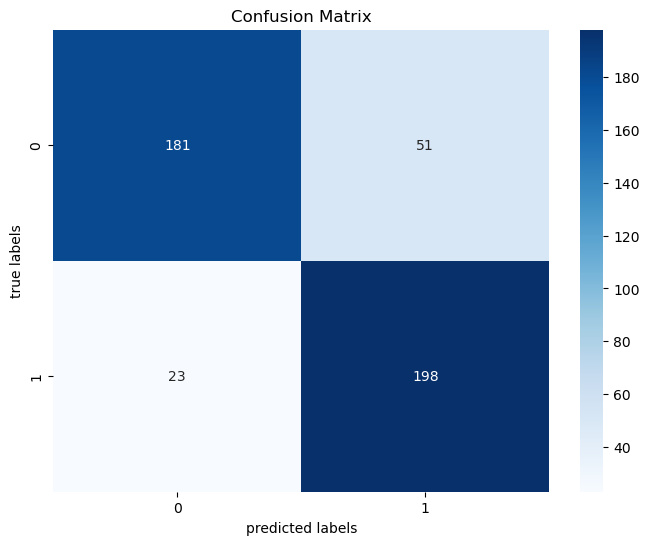

In [591]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()



__Performing Logistic model__

In [593]:
from sklearn.linear_model import LogisticRegression

In [594]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [595]:
Y_pred =model.predict(X_test)

In [596]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[158  74]
 [104 117]]


Accuracy: 0.6070640176600441


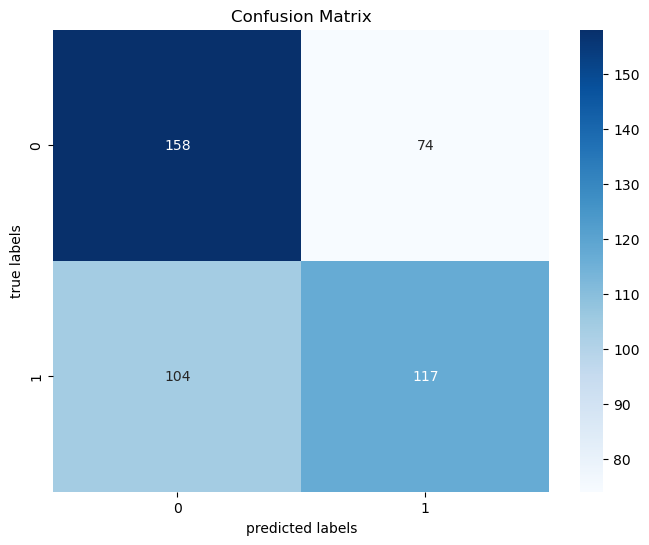

In [597]:
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

__Support Vector Machine__

In [599]:
model=SVC()
model.fit(X_train,Y_train)

SVC()

In [600]:
Y_pred =model.predict(X_test)

In [601]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[154  78]
 [ 89 132]]


Accuracy: 0.6313465783664459


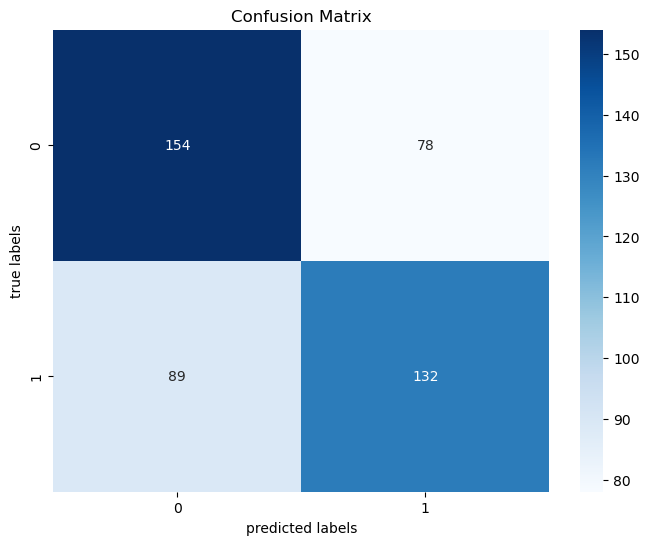

In [602]:
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

__KNN__

In [604]:
from sklearn.neighbors import KNeighborsClassifier

In [605]:
model =KNeighborsClassifier()
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [606]:
Y_pred =model.predict(X_test)

In [607]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[165  67]
 [ 78 143]]


Accuracy: 0.6799116997792495


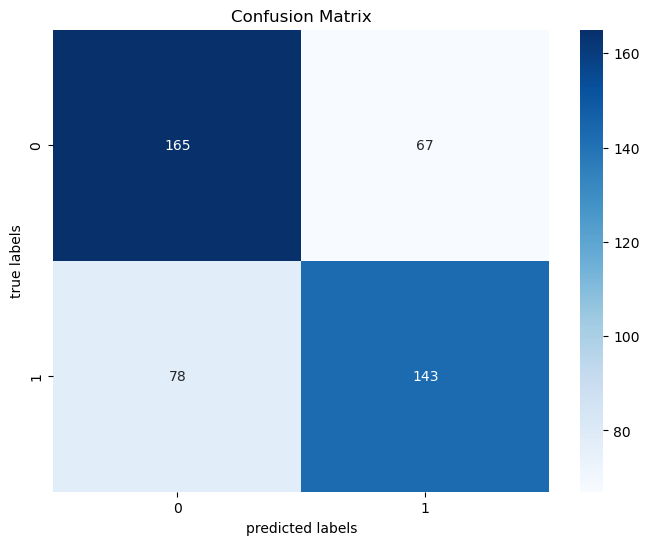

In [608]:
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

__Decision Tree__

In [610]:
model= DecisionTreeClassifier()
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [611]:
Y_pred =model.predict(X_test)

In [612]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[191  41]
 [ 22 199]]


Accuracy: 0.8609271523178808


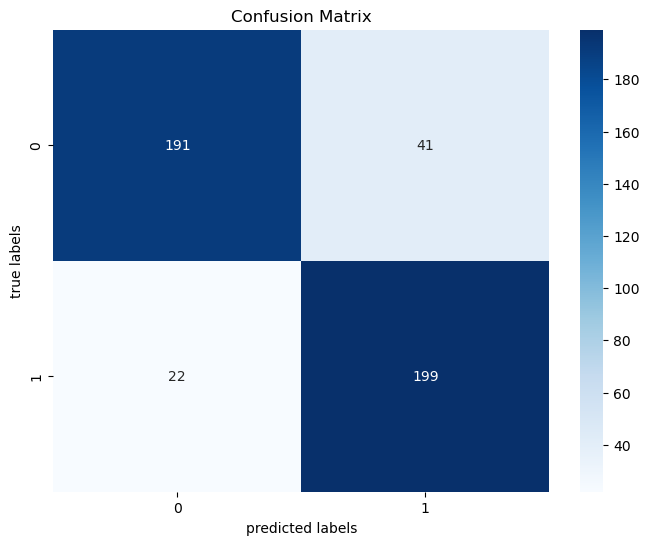

In [613]:
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

__XG Boost__

In [615]:
# !pip install xgboost

In [616]:
from xgboost import XGBClassifier

In [617]:
model=XGBClassifier()
model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [618]:
Y_pred =model.predict(X_test)

In [619]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[156  76]
 [ 34 187]]


Accuracy: 0.7571743929359823


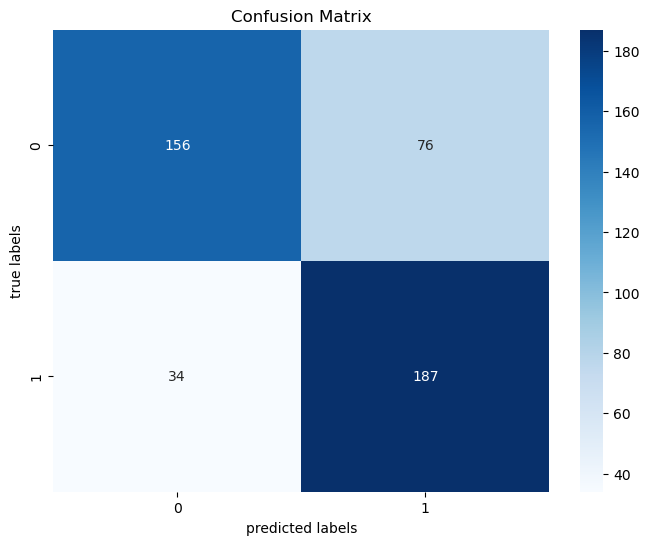

In [620]:
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

__MLP__

In [622]:
from sklearn.neural_network import MLPClassifier

## model=MLPClassifier(hidden_layer_sizes=[100,j],max_iter=500,activation='relu',solver='adam',random_state=42)
model.fit(X_train,Y_train)

In [624]:
j = 50
model = MLPClassifier(
    hidden_layer_sizes=[100, j], 
    max_iter=500, 
    activation='relu', 
    solver='adam', 
    random_state=42
)

In [625]:
model.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=[100, 50], max_iter=500, random_state=42)

In [626]:
Y_pred =model.predict(X_test)

In [627]:
conf_matrix = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[191  41]
 [ 46 175]]


Accuracy: 0.8079470198675497


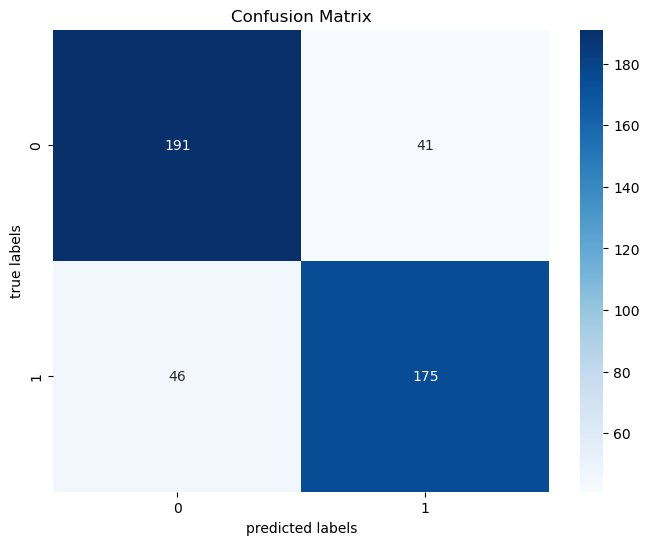

In [628]:
accuracy =accuracy_score(Y_test, Y_pred)
print('Accuracy:',accuracy)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.show()

__Comparing the accuracies of all predicted models__

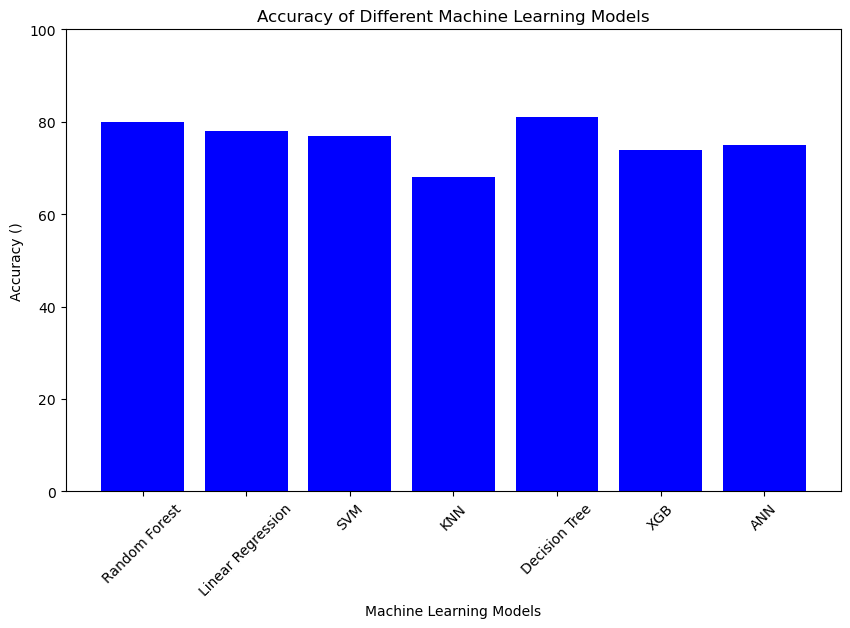

In [630]:
import matplotlib.pyplot as plt
#Model names

models= ['Random Forest', 'Linear Regression', 'SVM', 'KNN', 'Decision Tree', 'XGB', 'ANN']

#Accuracy scores

accuracy_scores = [80, 78, 77, 68, 81, 74, 75]
#Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color="blue")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy ()")
plt.title("Accuracy of Different Machine Learning Models")
plt.ylim(0, 100) #Set y-axis limit from 0 to 100
plt.xticks(rotation=45) #Rotate x-axis labels for better readability
#plt.grid(axis='y', Linestyle='--', alpha=0.7)# And gridlines
plt.show()

__Hyper Parameter Tuning__

In [632]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from scipy.stats import randint

# Create synthetic data for classification
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=55)

# Initialize a random forest classifier
model = RandomForestClassifier(random_state=42)

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(50, 200),       # Number of trees
    'max_depth': randint(15, 35),           # Maximum depth of trees
    'min_samples_split': randint(2, 20),   # Minimum number of samples required to split
    'min_samples_leaf': randint(1, 10),    # Minimum number of samples at a leaf node
    'bootstrap': [True, False]             # Whether to bootstrap samples
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,                   # Number of parameter settings to sample
    scoring='accuracy',          # Scoring metric
    cv=5,                        # 5-fold cross-validation
    verbose=2,                   # Verbose output
    random_state=42,             # For reproducibility
    n_jobs=-1                    # Use all available cores
)

# Run the search
random_search.fit(X, y)

# Print the best parameters and the best score
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 107}
Best Cross-Validation Score: 0.9269999999999999


__Evaluating the model after hyper parameter tuning__

In [634]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree_model = DecisionTreeClassifier(max_depth=40, random_state=100)  
decision_tree_model.fit(X_train, Y_train)
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_train_pred = decision_tree_model.predict(X_train)

# Printting the training and testing accuracy
print(f"Decision Tree Train Accuracy: {accuracy_score(Y_train, decision_tree_train_pred)}")
print(f"Decision Tree Test Accuracy: {accuracy_score(Y_test, decision_tree_pred)}")
# Printting the classification report for the test set
print(classification_report(Y_test, decision_tree_pred))


Decision Tree Train Accuracy: 0.9155162893429045
Decision Tree Test Accuracy: 0.7836644591611479
              precision    recall  f1-score   support

       False       0.89      0.66      0.76       232
        True       0.72      0.92      0.81       221

    accuracy                           0.78       453
   macro avg       0.81      0.79      0.78       453
weighted avg       0.81      0.78      0.78       453



In [852]:
random_forest = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=30,          # Maximum depth of each tree
    min_samples_split=10,   # Minimum samples required to split a node
    min_samples_leaf=2,    # Minimum samples required at a leaf node
    random_state=50
)
random_forest = RandomForestClassifier(n_estimators=35, random_state=2)
random_forest.fit(X_train, Y_train)
y_pred = random_forest.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

Accuracy: 0.8079470198675497

Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.82      0.81       232
        True       0.81      0.79      0.80       221

    accuracy                           0.81       453
   macro avg       0.81      0.81      0.81       453
weighted avg       0.81      0.81      0.81       453



In [636]:
svm_model = SVC(kernel='poly', C=100, gamma='auto', random_state=42)
svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.7682119205298014

Classification Report:
               precision    recall  f1-score   support

       False       0.74      0.84      0.79       232
        True       0.80      0.70      0.75       221

    accuracy                           0.77       453
   macro avg       0.77      0.77      0.77       453
weighted avg       0.77      0.77      0.77       453



In [637]:
mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50), 
    activation='tanh',            
    solver='adam',               
    max_iter=500,                 
    random_state=42
)
mlp_model.fit(X_train, Y_train)

# Step 8: Make predictions
y_pred = mlp_model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))


Accuracy: 0.7814569536423841

Classification Report:
               precision    recall  f1-score   support

       False       0.77      0.82      0.79       232
        True       0.80      0.74      0.77       221

    accuracy                           0.78       453
   macro avg       0.78      0.78      0.78       453
weighted avg       0.78      0.78      0.78       453



__CONCLUSION__

1.Before tuning the accuracy scores were below 70% for all types of models like logistic,decision tree,random forest,svm,knn,
mlpclassifier etc.To increase the model accuracy tuning is performed the data to get more accuracy.

2.The model achieved a high cross-validation score of 92.7% with bootstrap=False, max_depth=20, min_samples_leaf=2, min_samples_split=2, and n_estimators=107 which are the best hyperparameters in tuning the data, indicating strong generalization and performance on the training data. This suggests that the model is well-tuned and could perform well when applied to unseen data, potentially improving accuracy and reducing overfitting.

3.The Random forest model shows a high training accuracy of 81%, and also recall is increased to 0.84 indicating it performs well on the training data. However, the model's test accuracy is 77%, suggesting that it does not generalize as effectively to unseen data. The precision, recall, and F1-score for both classes indicate that the model performs reasonably well, with a slightly better performance for the "True" class in terms of recall and F1-score. The weighted average metrics indicate a balanced performance across both classes.